Score PCA: 0.6883116883116883
Score IPCA: 0.6883116883116883


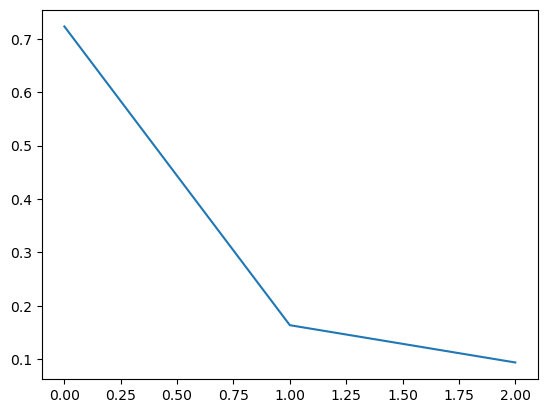

In [8]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    # Generate dataframes
    df_heart = pd.read_csv('heart.csv')
    df_features = df_heart.drop(['target'], axis=1)
    df_target = df_heart['target']

    # Scaling features
    dt_featues = StandardScaler().fit_transform(df_features) # Target must not be scaled
    
    # Slipt for train y test
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

    # PCA
    pca = PCA(n_components=3) # If no parameter is passed, pca =  min(n_samples, n_features)
    pca.fit(X_train)

    ipca = IncrementalPCA(n_components=3, batch_size=10) # Batch size is the number of samples to use in each iteration
    ipca.fit(X_train)

    plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
    #plt.show()

    # Logistic regression
    logistic = LogisticRegression(solver='lbfgs')

    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    print(f'Score PCA: {logistic.score(df_test, y_test)}')

    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    print(f'Score IPCA: {logistic.score(df_test, y_test)}')

In [4]:
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

if __name__ == "__main__":
    # Dataset
    dataset = pd.read_csv("felicidad.csv")
    X = dataset.drop(['country', 'rank', 'score'], axis=1)
    y = dataset['score']

    # Modelo
    reg = RandomForestRegressor()
    parametros = {
        'n_estimators': range(4,16), # Number of trees in the forest
        'criterion': ['absolute_error', 'squared_error'], # Function to measure the quality of a split
        'max_depth': range(2,11) # Maximum depth of the tree
    }

    rand_est = RandomizedSearchCV(reg, parametros, n_iter=10, cv=3, scoring='neg_mean_absolute_error').fit(X, y)
    print(rand_est.best_estimator_)

RandomForestRegressor(max_depth=4, n_estimators=12)


In [3]:
ruta = "heart.csv"
df = pd.read_csv(ruta)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


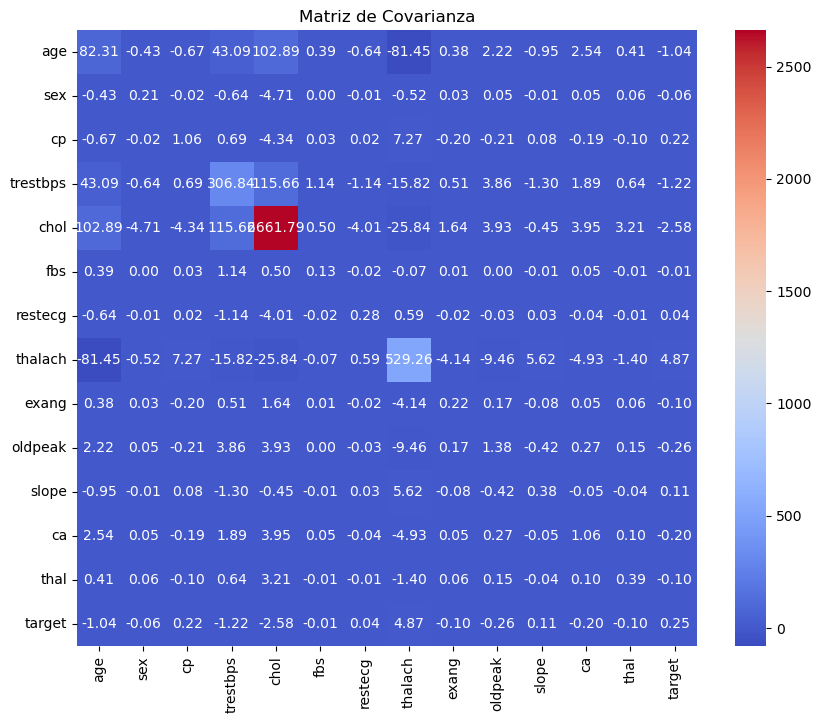

In [7]:
import seaborn as sns

cov_matrix = df.cov()
cov_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Covarianza')
plt.show()

In [3]:
import pandas as pd

ruta = 'felicidad_corrupt.csv'
df_corrupt = pd.read_csv(ruta)
df_corrupt.tail(12)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
155,A,156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,B,157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,C,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,D,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,E,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,F,161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,G,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
